In [1]:
import pandas as pd
df = pd.read_csv("Rent Data.csv")

In [2]:
df.shape

(29, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    29 non-null     int64
 1   rent    29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


In [4]:
df.tail()

,area,rent
24,2800,50000
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460


In [5]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    29 non-null     int64
 1   rent    29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


Text(0, 0.5, 'Rent')

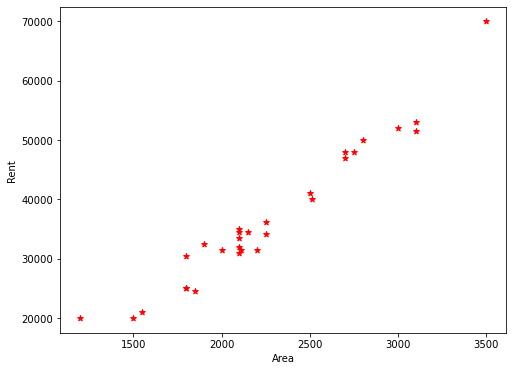

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
plt.scatter(df.area,df.rent,color="red",marker='*')
plt.xlabel('Area')
plt.ylabel("Rent")

# Sep x, y

In [8]:
x = df.drop('rent',axis=1) # x = df[['area']]
y = df.rent

In [9]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [10]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# validate training and testing data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.20, random_state=1 ) # ,random_state=1

In [13]:
xtest.head()

,area
14,2250
21,2100
18,1800
20,2110
25,3100


In [14]:
ytest.head()

14    34100
21    33500
18    25000
20    31500
25    53000
Name: rent, dtype: int64

In [15]:
xtest.shape

(6, 1)

In [16]:
xtrain.shape

(23, 1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regr = LinearRegression()

# training linear regression model with train data

In [19]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [20]:
m=regr.coef_
m

array([21.5391227])

In [21]:
c=regr.intercept_
c

-11658.40234364412

In [22]:
#y=mx+c
y=(2250*m)+c
y

array([36804.62372094])

In [23]:
x.mean()

area    2259.310345
dtype: float64

In [24]:
y.mean()

36804.62372094164

In [25]:
regr.predict(xtest)

array([36804.62372094, 33573.75531664, 27112.01850802, 33789.14654359,
       55112.87801201, 46497.22893386])

In [26]:
regr.predict(x)

array([31419.8430471 , 33573.75531664, 42189.40439478, 36804.62372094,
       52958.96574247, 29265.93077756, 20650.28169941, 28188.97464279,
       46497.22893386, 33573.75531664, 34650.7114514 , 33573.75531664,
       33573.75531664, 42404.79562174, 36804.62372094, 55112.87801201,
       27112.01850802, 21727.23783418, 27112.01850802, 46497.22893386,
       33789.14654359, 33573.75531664, 63728.52709016, 14188.5448908 ,
       48651.1412034 , 55112.87801201, 47574.18506863, 27112.01850802,
       35727.66758617])

In [27]:
df['Predicted Rent'] = regr.predict(x)
df.head()

,area,rent,Predicted Rent
0,2000,31500,31419.843047
1,2100,35000,33573.755317
2,2500,41050,42189.404395
3,2250,36100,36804.623721
4,3000,52100,52958.965742


# Best Fit Line

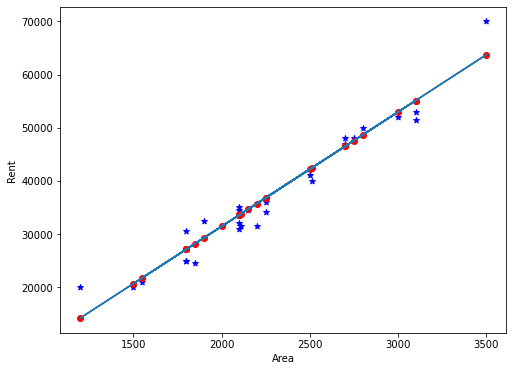

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df.area, df.rent, color='blue', marker = "*")
plt.xlabel('Area')
plt.ylabel('Rent')
plt.plot(df.area, df['Predicted Rent'])
plt.scatter(df.area, df['Predicted Rent'],color='red', )

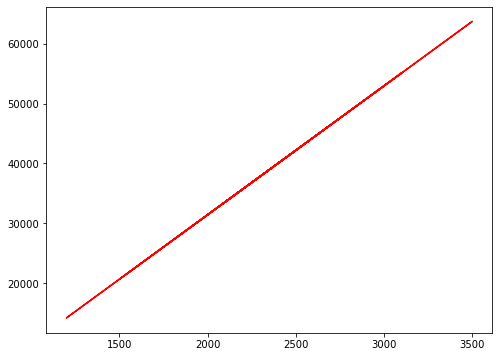

In [29]:
plt.figure(figsize=(8,6))
plt.plot(df.area, df['Predicted Rent'], color="red")


# Predicted y, df.predict(x)

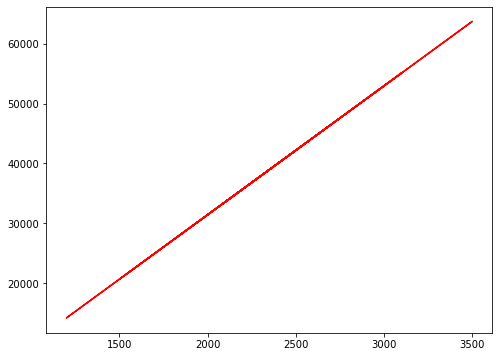

In [30]:
plt.figure(figsize=(8,6))
plt.plot(df.area, regr.predict(x), color="red" ) 

# Testing accuracy

In [31]:
regr.score(xtest, ytest) 

0.9604884343464322

In [32]:
pred_y = regr.predict(xtest)
pred_y

array([36804.62372094, 33573.75531664, 27112.01850802, 33789.14654359,
       55112.87801201, 46497.22893386])

In [33]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred_y)
mse

3623045.938908616

In [34]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(ytest, pred_y)
mse

1632.5321945567146

# predict

In [35]:
import warnings
warnings.filterwarnings("ignore")

regr.predict([[1850]])

array([28188.97464279])

# Warning ignore

In [36]:
import warnings
warnings.filterwarnings("ignore")

# Save model using Joblib

In [37]:
import joblib as jb
jb.dump(regr,"B_SV_JB")


['B_SV_JB']

In [38]:
reg2 = jb.load("B_SV_JB")

In [39]:
reg2.predict([[234]])

array([-6618.24763293])

# Save model using Pickel

In [40]:
import pickle as pk
with open ("B_SV_PK", "wb") as filles:
    pk.dump(regr,filles)

In [41]:
with open("B_SV_PK", "rb") as file:
    reg3=pk.load(file)
reg3

LinearRegression()

In [42]:
reg3.predict([[234]])

array([-6618.24763293])

# Easy way Using pickle:


In [43]:
import pickle as pk
pk.dump(regr, open("B_2", "wb"))

In [44]:
reg4=pk.load(open("B_2","rb"))
reg4

LinearRegression()

In [45]:
reg4.predict([[234]])

array([-6618.24763293])